In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# NEW MODEL

In [2]:
bitcoin_df = pd.read_csv('Project.csv')

In [3]:
bitcoin_df.head()

,Timestamp,avg-block-size,fees-usd-per-transaction,market-price,miners-revenue,trade-volume,difficulty,GLDPrice,Adj Close
0,18-09-2014 00:00,0.236703,0.072554,425.56,2423050.762,9.378125e+06,2.982973e+10,15.91,328.539368
1,24-09-2014 00:00,0.285509,0.072386,423.68,1964038.526,6.001796e+06,2.982973e+10,15.24,331.250000
2,30-09-2014 00:00,0.297151,0.057961,390.18,1640655.870,5.593043e+06,3.466143e+10,14.58,306.417480
3,03-10-2014 00:00,0.289027,0.060243,358.90,1517310.193,7.318369e+06,3.466143e+10,14.08,287.264862
4,06-10-2014 00:00,0.280037,0.052130,327.61,1486380.208,2.279554e+07,3.466143e+10,14.16,261.076508


In [4]:
bitcoin_df.isnull().sum()

Timestamp                   1
avg-block-size              1
fees-usd-per-transaction    1
market-price                1
miners-revenue              1
trade-volume                1
difficulty                  1
GLDPrice                    1
Adj Close                   1
dtype: int64

In [5]:
bitcoin_df.dropna(how = "all", inplace = True)

In [6]:
bitcoin_df.isnull().sum()

Timestamp                   0
avg-block-size              0
fees-usd-per-transaction    0
market-price                0
miners-revenue              0
trade-volume                0
difficulty                  0
GLDPrice                    0
Adj Close                   0
dtype: int64

In [86]:
cor = bitcoin_df.corr()

In [87]:
cor

,avg-block-size,fees-usd-per-transaction,market-price,miners-revenue,trade-volume,difficulty,GLDPrice,Adj Close
avg-block-size,1.000000,0.299276,0.705144,0.571689,0.264143,0.715390,0.613783,0.719210
fees-usd-per-transaction,0.299276,1.000000,0.510858,0.670796,0.566389,0.120787,0.158262,0.500731
market-price,0.705144,0.510858,1.000000,0.874087,0.513486,0.781287,0.489983,0.998492
miners-revenue,0.571689,0.670796,0.874087,1.000000,0.661605,0.520570,0.236460,0.877853
trade-volume,0.264143,0.566389,0.513486,0.661605,1.000000,0.085060,-0.047452,0.502165
difficulty,0.715390,0.120787,0.781287,0.520570,0.085060,1.000000,0.659471,0.797096
GLDPrice,0.613783,0.158262,0.489983,0.236460,-0.047452,0.659471,1.000000,0.496928
Adj Close,0.719210,0.500731,0.998492,0.877853,0.502165,0.797096,0.496928,1.000000


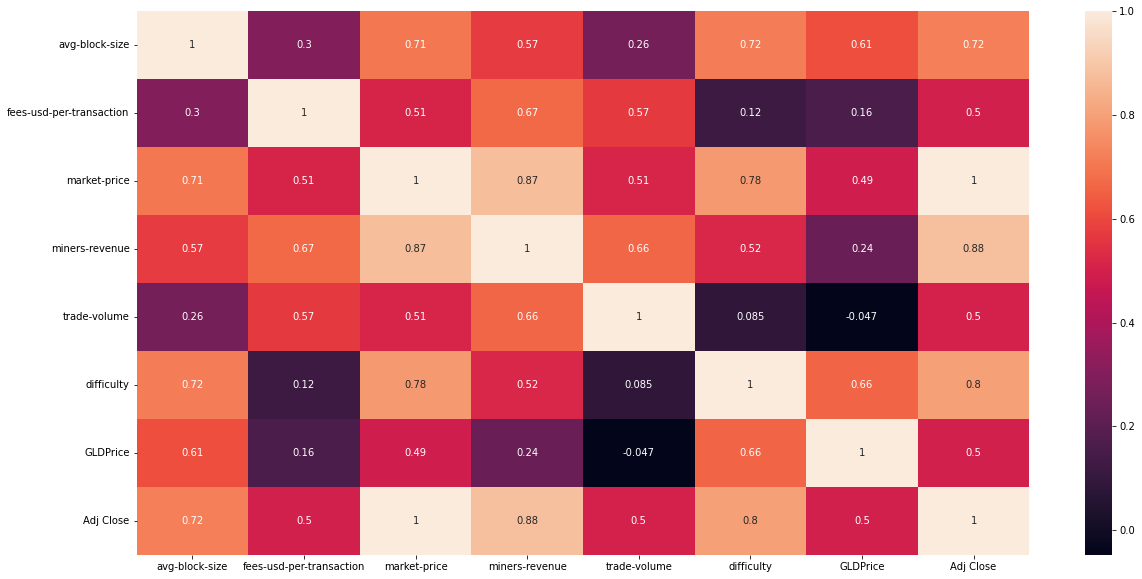

In [10]:
m = bitcoin_df.corr()
plt.figure(figsize=(20, 10))
ax = plt.subplot()
sns.heatmap(m, annot = True, ax = ax);

In [11]:
x = bitcoin_df.drop(columns = ["Adj Close","Timestamp"])
y = bitcoin_df['Adj Close']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
x_train.shape

(393, 7)

In [14]:
x_test.shape

(132, 7)

In [15]:
regressor = LinearRegression()

In [16]:
regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
print(regressor.coef_)

[ 2.28068764e+02 -1.06348980e+01  7.50890997e-01  3.71300286e-05
  1.75082891e-08  4.13145074e-11  1.20997183e+00]


In [19]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
avg-block-size,2.280688e+02
fees-usd-per-transaction,-1.063490e+01
market-price,7.508910e-01
miners-revenue,3.713003e-05
trade-volume,1.750829e-08
difficulty,4.131451e-11
GLDPrice,1.209972e+00


In [20]:
print(regressor.intercept_)

-154.25557754913916


In [21]:
predicted = regressor.predict(x_test)

In [22]:
print(x_test)

     avg-block-size  fees-usd-per-transaction  market-price  miners-revenue  \
208        0.991798                  0.916311       1192.09    2.451454e+06   
15         0.360704                  0.056304        356.47    1.445702e+06   
229        0.983088                  3.381665       2477.94    5.412747e+06   
298        0.825766                  1.253421       7941.46    1.446751e+07   
451        1.199867                  0.921670       9854.79    1.567155e+07   
..              ...                       ...           ...             ...   
100        0.643186                  0.065575        361.47    1.519900e+06   
492        1.264695                  3.453464      11774.38    1.370996e+07   
210        0.982004                  0.935818       1113.00    2.221576e+06   
282        1.102733                  6.056735       6925.46    1.916522e+07   
56         0.412173                  0.034824        238.80    9.085971e+05   

     trade-volume    difficulty  GLDPrice  
208  9.

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df

,Actual,Predicted
208,1123.442627,1088.876007
15,285.313354,265.937834
229,2249.718750,2143.157789
298,6398.937500,6707.484383
451,9034.057617,8756.627673
...,...,...
100,330.749359,331.788928
492,9937.870117,10180.774006
210,1036.385498,1021.268397
282,5624.965820,6105.098967


In [61]:
df0 = df.sort_index(ascending = True)

In [69]:
df0

,Actual,Predicted
1,331.250000,320.930106
7,304.023773,294.620187
10,273.877686,249.546238
12,294.792755,274.944370
15,285.313354,265.937834
...,...,...
512,12967.122070,13080.927532
517,16440.384770,16199.424909
522,18637.574220,18781.890939
523,19481.566410,19422.135364


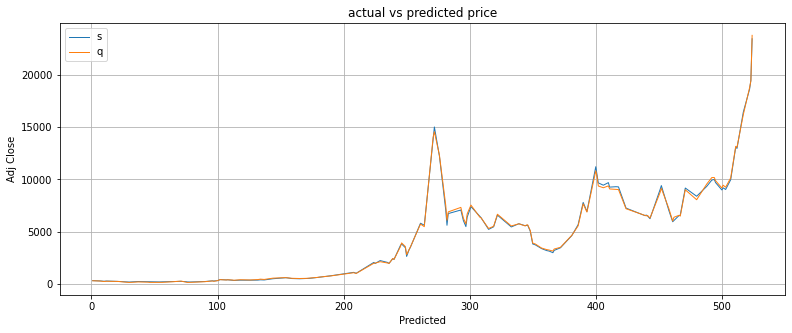

In [67]:
plt.figure(figsize = (13, 5))
plt.plot(df0, linewidth = 1)
plt.title("actual vs predicted price")
plt.xlabel('Predicted')
plt.ylabel('Adj Close')
plt.legend("squares")
plt.grid()

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 102.6643488558406
Mean Squared Error: 21984.819245147024
Root Mean Squared Error: 148.27278659668815


In [75]:
r2_score(y_test, predicted)

0.9989622496146447

# OLD MODEL #

In [76]:
btc_df = pd.read_csv('BTC-EURyaahoo.csv')

In [78]:
btc_df.head()

,Date,Open,Close,Adj Close
0,17-09-2014,359.546204,355.957367,355.957367
1,18-09-2014,355.588409,328.539368,328.539368
2,19-09-2014,328.278503,307.761139,307.761139
3,20-09-2014,307.665253,318.758972,318.758972
4,21-09-2014,318.120514,310.632446,310.632446


In [106]:
btc_df.isnull().sum()

Date         0
Open         0
Close        0
Adj Close    0
dtype: int64

In [102]:
btc_df.dropna(inplace = True)

In [107]:
cor1 = btc_df.corr()

In [108]:
cor1

,Open,Close,Adj Close
Open,1.00000,0.99803,0.99803
Close,0.99803,1.00000,1.00000
Adj Close,0.99803,1.00000,1.00000


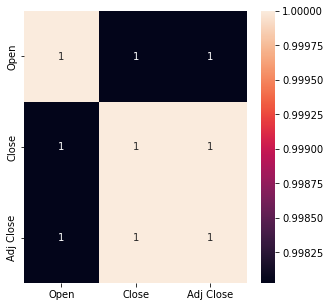

In [109]:
m1 = btc_df.corr()
plt.figure(figsize=(5, 5))
ax = plt.subplot()
sns.heatmap(m1, annot = True, ax = ax);

In [110]:
x1 = btc_df.drop(columns = ["Adj Close", "Date"])
y1 = btc_df['Adj Close']

In [111]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=0)

In [112]:
x1_train.shape

(1725, 2)

In [113]:
x1_test.shape

(576, 2)

In [114]:
regressor1 = LinearRegression()

In [115]:
regressor1.fit(x1_train, y1_train)

LinearRegression()

In [116]:
print(regressor1.coef_)

[8.96867695e-16 1.00000000e+00]


In [122]:
coeff_df1 = pd.DataFrame(regressor1.coef_, x1.columns, columns=['Coefficient'])
coeff_df1

,Coefficient
Open,8.968677e-16
Close,1.000000e+00


In [123]:
predicted1 = regressor1.predict(x1_test)

In [124]:
print(x1_test)

             Open        Close
1349  6306.733398  6139.014160
333    235.766632   233.036133
2129  8050.777344  8017.411133
286    229.189484   236.299286
57     343.771027   337.343628
...           ...          ...
917   1036.487305   972.326233
1893  6620.058105  6712.272461
979   1950.307129  2076.438477
1277  6772.938965  6443.297852
1524  4925.349121  4253.278320

[576 rows x 2 columns]


In [126]:
DF = pd.DataFrame({'Actual': y1_test, 'Predicted': predicted1})
DF

,Actual,Predicted
1349,6139.014160,6139.014160
333,233.036133,233.036133
2129,8017.411133,8017.411133
286,236.299286,236.299286
57,337.343628,337.343628
...,...,...
917,972.326233,972.326233
1893,6712.272461,6712.272461
979,2076.438477,2076.438477
1277,6443.297852,6443.297852


In [129]:
DF0 = DF.sort_index(ascending = True)

In [130]:
DF0

,Actual,Predicted
1,328.539368,328.539368
6,339.189758,339.189758
9,318.896851,318.896851
10,315.029175,315.029175
11,297.578705,297.578705
...,...,...
2278,15525.333010,15525.333010
2287,18637.574220,18637.574220
2288,19514.736330,19514.736330
2292,21683.658200,21683.658200


In [131]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, predicted1))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test,predicted1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, predicted1)))

Mean Absolute Error: 6.810848181733794e-13
Mean Squared Error: 7.384285016429624e-25
Root Mean Squared Error: 8.593186263796232e-13


In [132]:
r2_score(y1_test, predicted1)

1.0